# Autoencoders examples

## Environment setup

In [1]:
library(devtools)
library(ggpubr)
#loading DAL
#Current version
source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox")

Loading required package: usethis

Loading required package: ggplot2

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




### Data

In [2]:
#Install package
#install.packages("devtools")
library(devtools)
#devtools::install_github("cefet-rj-dal/event_datasets", force=TRUE)
library(dalevents)

#Load a series
data(oil_3w_Type_1)

series <- oil_3w_Type_1$Type_1
series <- series$`WELL-00001_20140124213136`

#Use the loaded series
summary(series)
series$T_JUS_CKGL <- NULL

head(series)

     P_PDG       P_TPT              T_TPT         P_MON_CKP      
 Min.   :0   Min.   :17435930   Min.   :116.9   Min.   :7950450  
 1st Qu.:0   1st Qu.:17472050   1st Qu.:117.2   1st Qu.:7981696  
 Median :0   Median :17598880   Median :117.4   Median :8122462  
 Mean   :0   Mean   :17739948   Mean   :117.4   Mean   :8294544  
 3rd Qu.:0   3rd Qu.:17929330   3rd Qu.:117.5   3rd Qu.:8495280  
 Max.   :0   Max.   :18433410   Max.   :117.7   Max.   :9366608  
                                                                 
   T_JUS_CKP       P_JUS_CKGL      T_JUS_CKGL          QGL        class      
 Min.   :75.35   Min.   :-300918   Mode:logical   Min.   :0   Min.   :  0.0  
 1st Qu.:76.30   1st Qu.:-300918   NA's:12505     1st Qu.:0   1st Qu.:101.0  
 Median :77.98   Median :-300918                  Median :0   Median :101.0  
 Mean   :77.62   Mean   :-300918                  Mean   :0   Mean   : 78.9  
 3rd Qu.:78.96   3rd Qu.:-300918                  3rd Qu.:0   3rd Qu.:101.0  
 Max

P_PDG,P_TPT,T_TPT,P_MON_CKP,T_JUS_CKP,P_JUS_CKGL,QGL,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,18433410,116.9109,9366608,75.34820,-300917.8,0,0
0,18433410,116.9109,9366602,75.34825,-300917.8,0,0
0,18433410,116.9109,9366598,75.34831,-300917.8,0,0
0,18433410,116.9109,9366592,75.34837,-300917.8,0,0
0,18433410,116.9109,9366588,75.34843,-300917.8,0,0
0,18433410,116.9109,9366583,75.34848,-300917.8,0,0


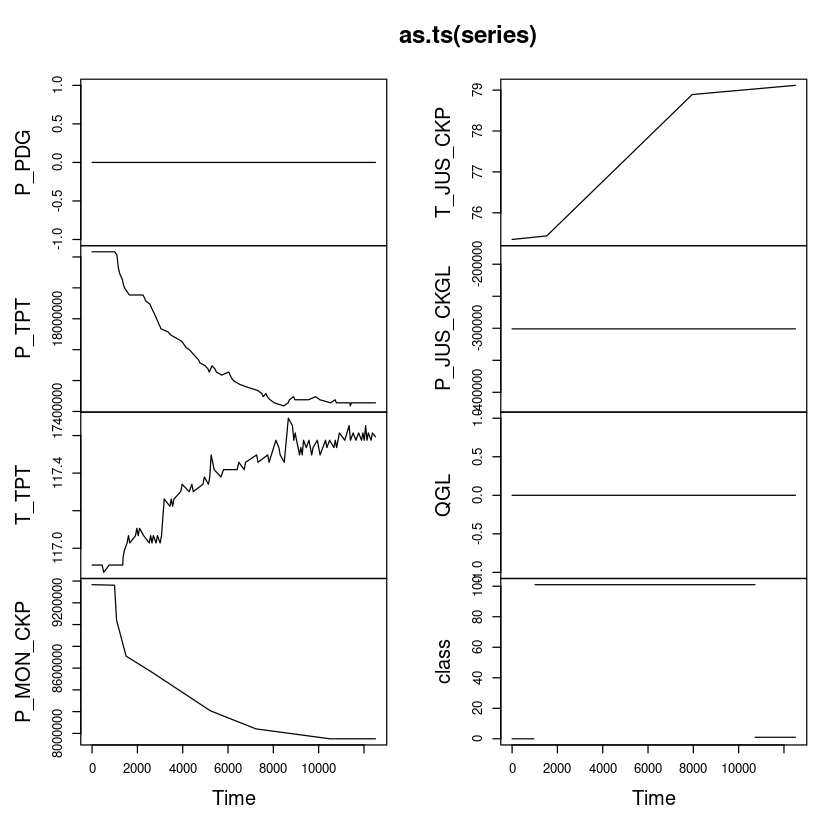

In [3]:
plot(as.ts(series))

In [4]:
# Data --------------------------------------------------------------------
data <- series[,1:7]
head(data)

P_PDG,P_TPT,T_TPT,P_MON_CKP,T_JUS_CKP,P_JUS_CKGL,QGL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,18433410,116.9109,9366608,75.34820,-300917.8,0
0,18433410,116.9109,9366602,75.34825,-300917.8,0
0,18433410,116.9109,9366598,75.34831,-300917.8,0
0,18433410,116.9109,9366592,75.34837,-300917.8,0
0,18433410,116.9109,9366588,75.34843,-300917.8,0
0,18433410,116.9109,9366583,75.34848,-300917.8,0


In [5]:
# Data --------------------------------------------------------------------
labels <- as.data.frame(series$class)
names(labels) <- "class"

In [6]:
#Transition interval
labels$trans <- 0
nas <- is.na(labels$class)
labels$trans[nas] <- 1

In [7]:
labels$cpd <- 0

cp = FALSE
for (i in 1:nrow(labels)){
  if (cp == FALSE){
    if(!is.na(labels$class[i]) && labels$class[i] != 0){
      print("Ponto de mudança localizado em:")
      print(i)
      labels$cpd[i] <- 1
      cp = i
    }
  }
}

[1] "Ponto de mudança localizado em:"
[1] 1017


In [8]:
cp

[1] 1017

In [9]:
i = cp+1
cp = FALSE
print(i)

[1] 1018


In [10]:
for (i in 1018:nrow(labels)){
  if (cp == FALSE){
    if(!is.na(labels$class[i]) && labels$class[i] != 101){
      print("Ponto de mudança localizado em:")
      print(i)
      labels$cpd[i] <- 1
      cp = i
    }
  }
}

[1] "Ponto de mudança localizado em:"
[1] 10725


In [11]:
sum(labels$cpd)
head(labels)

[1] 2

,class,trans,cpd
,<dbl>,<dbl>,<dbl>
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0


In [12]:
samp <- ts_sample(data, test_size = as.integer(nrow(data)*0.2))

In [13]:
train <- as.data.frame(samp$train)
test <- as.data.frame(samp$test)
features <- names(train)

## Autoencoders usage

### Vanilla Autoencoder

In [14]:
# ***  Vanilla Autoencoder application *** --------------------------------
# -------------------------------------------------------------------------
#Create model
input_size = length(data)

ae <- autoenc_encode_decode(input_size, 1)

In [15]:
#Fit
ae <- fit(ae, train)

In [16]:
#Decode
result <- transform(ae, data)

In [17]:
result <- as.data.frame(result)
names(result) <- features
head(result)

,P_PDG,P_TPT,T_TPT,P_MON_CKP,T_JUS_CKP,P_JUS_CKGL,QGL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01702864,18818190,127.2932,8602350,83.13842,-323768.2,-1.923641
2,0.01702864,18818190,127.2932,8602350,83.13842,-323768.2,-1.923641
3,0.02484114,18818190,127.2932,8602349,83.15405,-323768.2,-1.931453
4,0.02484114,18818188,127.3088,8602348,83.16967,-323768.1,-1.958797
5,0.03265364,18818186,127.2932,8602348,83.18530,-323768.1,-1.923641
6,0.03265364,18818184,127.3244,8602346,83.16967,-323768.1,-1.927547


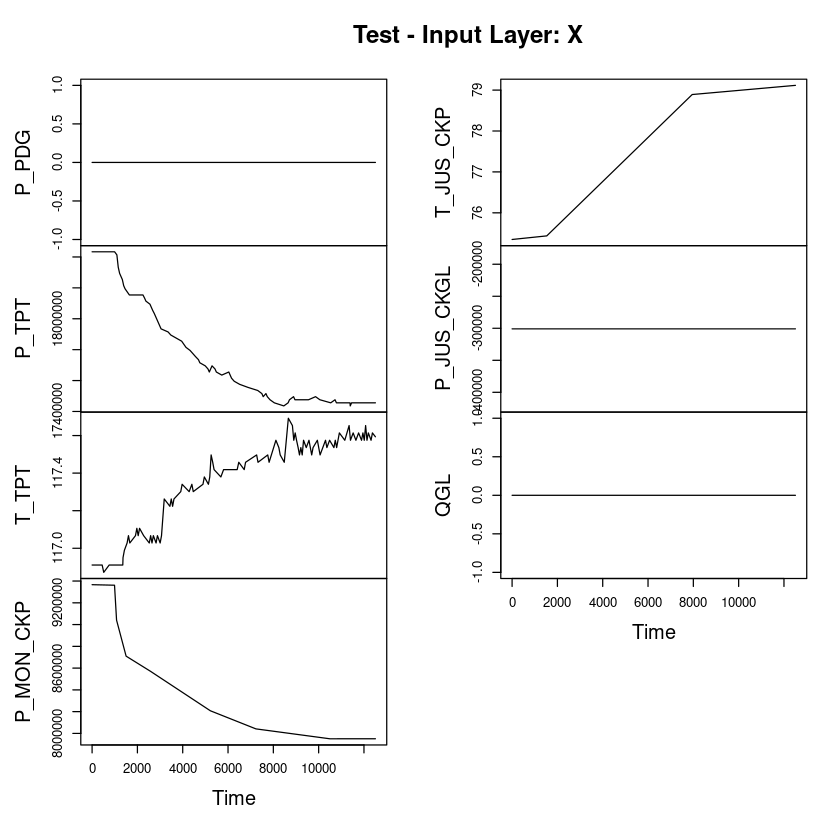

In [18]:
#Input Layer
plot(as.ts(data),
     main = "Test - Input Layer: X")

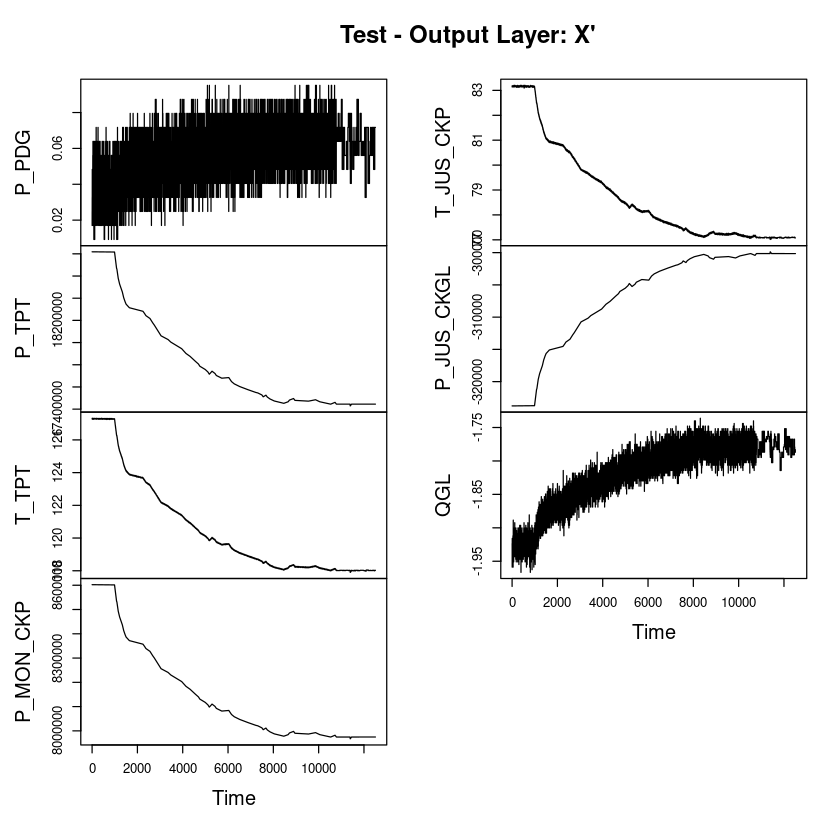

In [19]:
#Output Layer
plot(as.ts(result),
     main = "Test - Output Layer: X'")

In [20]:
#Latent Space
ls <- autoenc_encode(input_size, 1)

In [21]:
ls <- fit(ls, train)

In [22]:
ls_result <- transform(ls, data)

In [23]:
ls_result <- as.data.frame(ls_result)

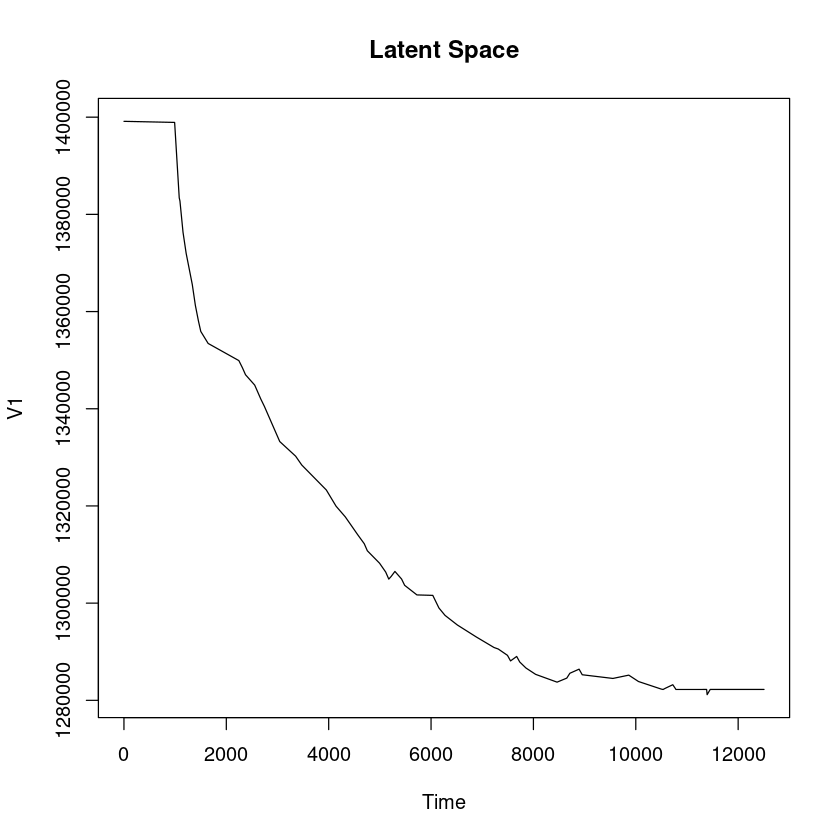

In [24]:
#Latent Space
plot(as.ts(ls_result),
     main = "Latent Space")

In [25]:
head(ls_result)

,V1
,<dbl>
1,1399143
2,1399142
3,1399142
4,1399142
5,1399142
6,1399142
